![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
!pip install livelossplot
from sklearn.model_selection import train_test_split
from keras import initializers
from livelossplot import PlotLossesKeras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import History


In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


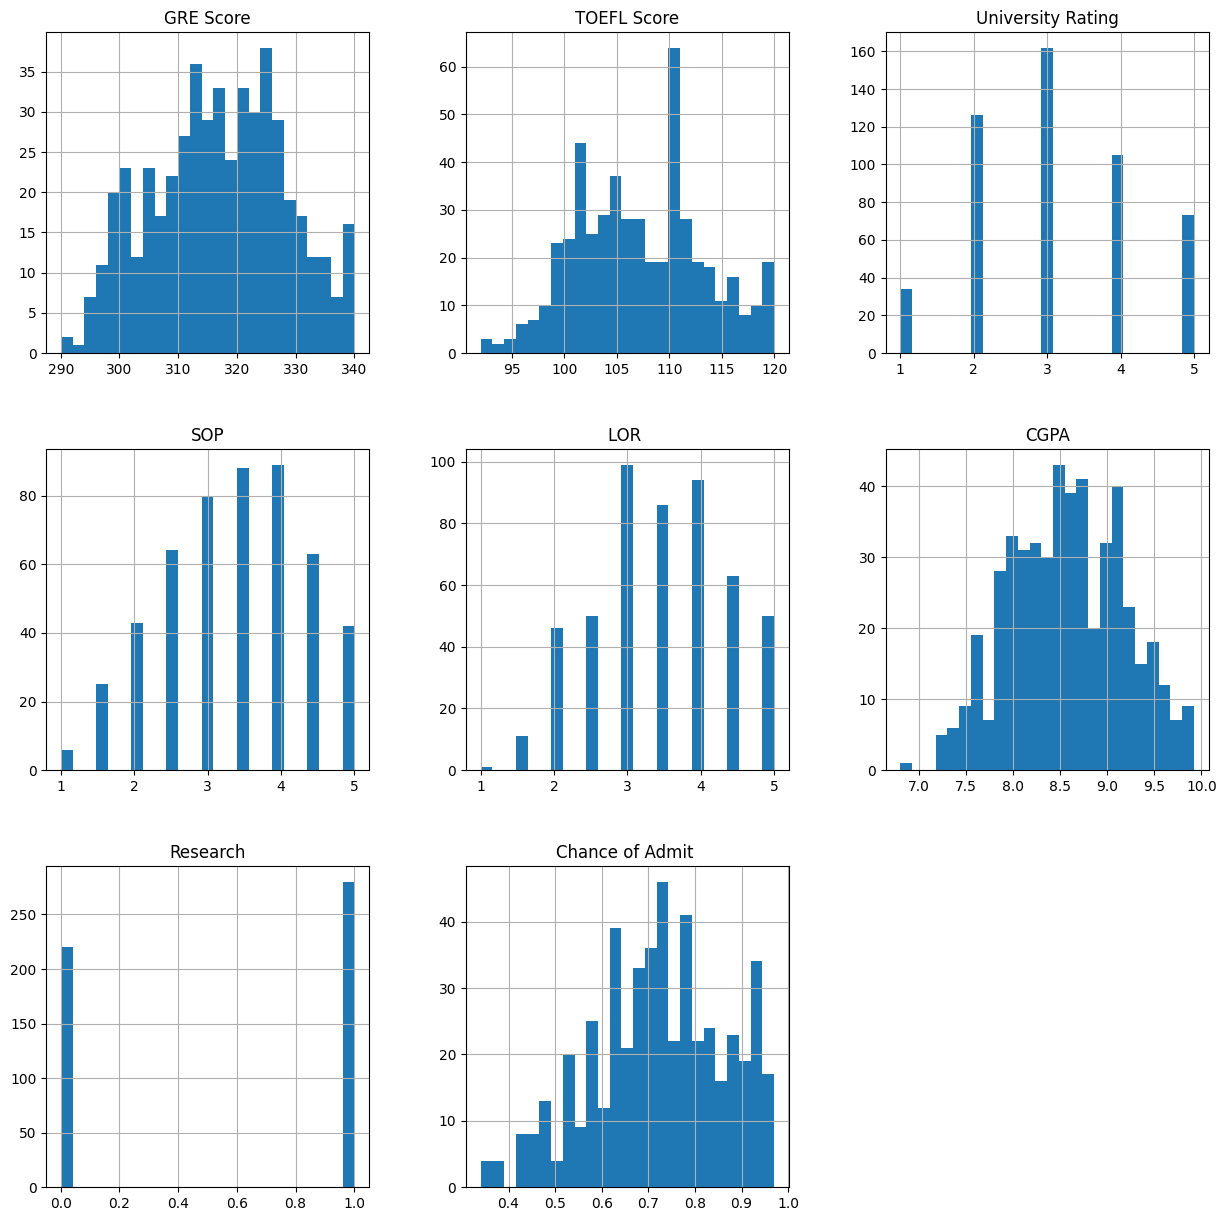

In [4]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [5]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [6]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

In [7]:
# Estandarizamos/normalizamos las variables predictoras X con StandardScaler
from sklearn.preprocessing import StandardScaler

# Definición de función
scaler = StandardScaler()
scaler.fit(X)

# Transformación del set de train y test
xTrain = pd.DataFrame(data=scaler.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
xTest = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

xTrain = np.array(xTrain)
yTrain = np.array(yTrain)

xTest = np.array(xTest)
yTest = np.array(yTest)

In [8]:
output_var = 1
print(output_var, 'output variables')

1 output variables


In [9]:
dims = xTrain.shape[1]
print(dims, 'input variables')

7 input variables


## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

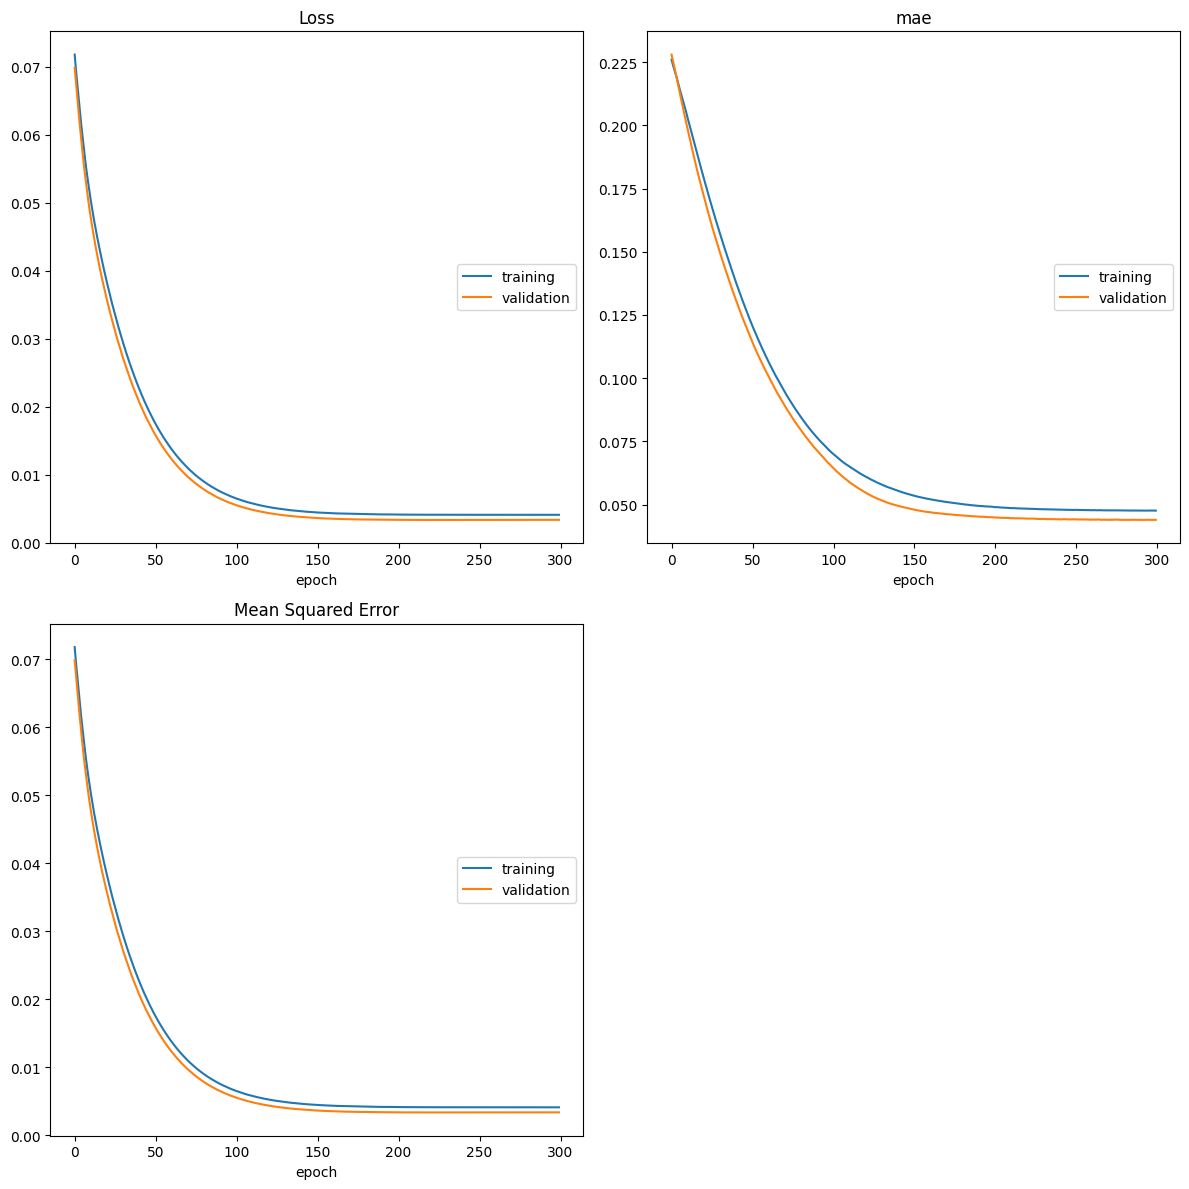

Loss
	training         	 (min:    0.004, max:    0.072, cur:    0.004)
	validation       	 (min:    0.003, max:    0.070, cur:    0.003)
mae
	training         	 (min:    0.048, max:    0.226, cur:    0.048)
	validation       	 (min:    0.044, max:    0.228, cur:    0.044)
Mean Squared Error
	training         	 (min:    0.004, max:    0.072, cur:    0.004)
	validation       	 (min:    0.003, max:    0.070, cur:    0.003)
5/5 [==============================] - 0s 5ms/step - loss: 0.0034 - mae: 0.0439 - mse: 0.0034
Error absoluto medio (MAE): 0.043934933841228485
Error cuadrático medio (MSE): 0.003389120800420642


In [10]:
# Celda 1
from keras import backend as K

K.clear_session()
model = Sequential()
model.add(Dense(1, input_dim=xTrain.shape[1], activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

model.fit(xTrain, yTrain,
          verbose=1,
          epochs=300,
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

loss, mae_one, mse_one = model.evaluate(xTest, yTest, verbose=1)
print("Error absoluto medio (MAE):", mae_one)
print("Error cuadrático medio (MSE):", mse_one)

Las pérdidas en el training y validation disminuyeron, lo cual nos da a entender que el modelo está aprendiendo de manera efectiva. La valores de pérdida de validación son parecidas a las de entrenamiento, lo cual es un buen indicador de que no hay sobreajuste muy alto. Adicionalmente, las curvas de pérdidas de entrenamiento y validación convergen en valores cercanos, lo cual indica que el número de épocas utilizado es el adecuado.
El MAE y el MSE en los datos de entrenamiento son bajos, lo cual nos da a comprender que las predicciones obtenidas están cercanas a los valores reales.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

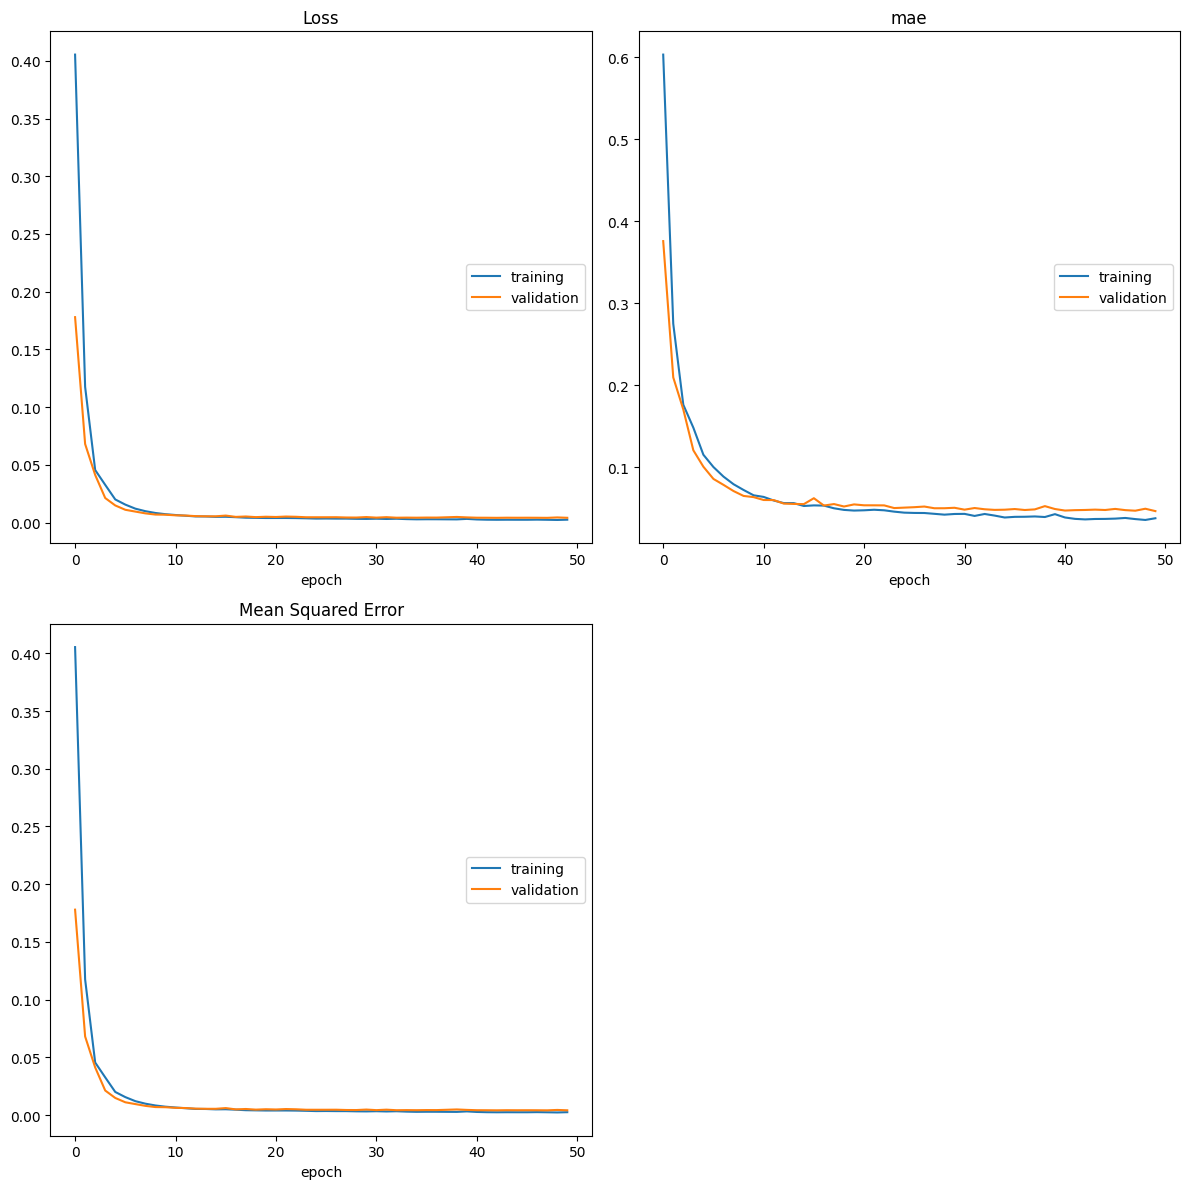

Loss
	training         	 (min:    0.002, max:    0.405, cur:    0.003)
	validation       	 (min:    0.004, max:    0.178, cur:    0.004)
mae
	training         	 (min:    0.036, max:    0.603, cur:    0.038)
	validation       	 (min:    0.046, max:    0.376, cur:    0.046)
Mean Squared Error
	training         	 (min:    0.002, max:    0.405, cur:    0.003)
	validation       	 (min:    0.004, max:    0.178, cur:    0.004)
5/5 [==============================] - 0s 3ms/step - loss: 0.0048 - mae: 0.0511 - mse: 0.0048
Error Absoluto Medio (MAE): 0.05114066228270531
Error Cuadrático Medio (MSE): 0.004827346187084913


In [11]:
# Celda 2
from keras.layers import Dense, Activation
from keras import backend as K
#Limpiar la session
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de las dimensiones de entrada y salida
input_var = xTrain.shape[1]
output_var = yTrain.shape[0]

# 2 capas y una de salida
model.add(Dense(250, input_shape=(input_var,),activation='relu'))
model.add(Dense(250,activation='relu'))
model.add(Dense(output_var))

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
#model.compile(optimizer='sgd', loss='mean_squared_error')
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
# Separación de datos de entrenamiento para considerar un set de validación durante entrenamiento
X_train, X_val, Y_train, Y_val = train_test_split(xTrain, yTrain, test_size=0.15, random_state=42)
# Entrenamiento de la red neuronal con 50 épocas
model.fit(X_train, Y_train,
          validation_data = (X_val, Y_val),
          epochs=50,
          callbacks=[PlotLossesKeras()])

#métricas error absoluto medio (MAE) y error cuadrático medio (MSE)
loss, mae_mul, mse_mul = model.evaluate(xTest, yTest, verbose=1)

print("Error Absoluto Medio (MAE):", mae_mul)
print("Error Cuadrático Medio (MSE):", mse_mul)

Los resultados de la grafica de perdida indican un buen aprendizaje inicial y una adecuada generalización. Ambas pérdidas disminuyen muy rápidamente en las primeras épocas,  y la pérdida de validación se estabiliza después de una caída inicial, lo cual puede sugerir que el modelo ha alcanzado su capacidad de aprendizaje con la configuración actual.

**Capas del Modelo:**
Se añaden tres capas Dense. Las primeras dos capas tienen 250 neuronas cada una y utilizan la función de activación ReLU. La tercera capa (capa de salida) tiene un número de neuronas igual a output_var

Para elegir el numero de neuronas se corrio el modelo con varios valores, y se decide utilizar 250 neuronas ya que genera un buen resultado con un buen costo computacional. Estos son algunos de los valores obtenidos.

250 neuronas
MAE 0,1038
MSE 0,0179

100 Neuronas
MAE: 0,11740
MSE: 0,02376

50  Neuronas
MAE 0.1266154
MSE 0.02766

Para el modelo se utilizo el optimizador adam y la función de pérdida mean_squared_error, por ser un problema de regresión. Además, se monitorean las métricas de mae (error absoluto medio) y mse (error cuadrático medio).
El modelo se entrena usando los datos de entrenamiento y validación durante 50 épocas y segun los resultados se evidencia que es un numero adecuado ya que aunque se alcanzo convergencia en etapas tempranas, las 50 etapas elegidas no representan un costo computacional alto y permiten asegurar que el modelo continua en convergencia para etapas posteriores.

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

Epoch 1/50
3/3 [==============================] - 1s 155ms/step - loss: 0.0721 - mae: 0.2300 - mse: 0.0721 - val_loss: 0.0411 - val_mae: 0.1779 - val_mse: 0.0411
Epoch 2/50
3/3 [==============================] - 0s 58ms/step - loss: 0.0471 - mae: 0.1835 - mse: 0.0471 - val_loss: 0.0272 - val_mae: 0.1461 - val_mse: 0.0272
Epoch 3/50
3/3 [==============================] - 0s 52ms/step - loss: 0.0336 - mae: 0.1540 - mse: 0.0336 - val_loss: 0.0183 - val_mae: 0.1176 - val_mse: 0.0183
Epoch 4/50
3/3 [==============================] - 0s 52ms/step - loss: 0.0254 - mae: 0.1331 - mse: 0.0254 - val_loss: 0.0132 - val_mae: 0.0939 - val_mse: 0.0132
Epoch 5/50
3/3 [==============================] - 0s 44ms/step - loss: 0.0188 - mae: 0.1122 - mse: 0.0188 - val_loss: 0.0102 - val_mae: 0.0761 - val_mse: 0.0102
Epoch 6/50
3/3 [==============================] - 0s 44ms/step - loss: 0.0140 - mae: 0.0919 - mse: 0.0140 - val_loss: 0.0083 - val_mae: 0.0651 - val_mse: 0.0083
Epoch 7/50
3/3 [=================

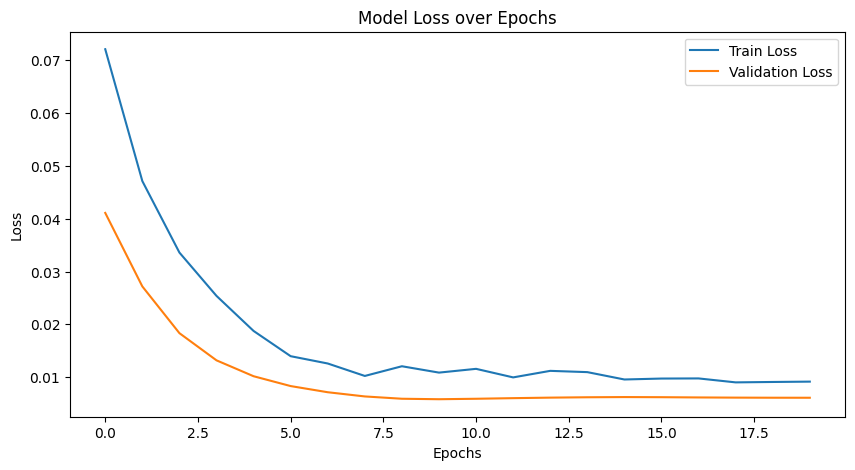

In [12]:
# Celda 3
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  # Asegúrate de tener esta importación

# Limpiar la sesión anterior de Keras para asegurarnos de que el modelo se inicie limpio
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
input_var = xTrain.shape[1]  # Número de características de entrada
output_var = 1               # Probabilidad de admisión (una salida)

# Añadir capas al modelo
model.add(Dense(128, input_shape=(input_var,), activation='relu'))
model.add(Dropout(0.5))  # Dropout para reducir el sobreajuste
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Segundo dropout
model.add(Dense(output_var, activation='sigmoid'))  # Capa de salida con activación sigmoid

# Compilación del modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Callbacks para el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
fBestModel = 'best_model.keras'  # Nombre del archivo para guardar el mejor modelo
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

# Entrenamiento del modelo
history = model.fit(X_train, Y_train,
                    batch_size=128,
                    epochs=50,
                    validation_data=(xTest, yTest),
                    callbacks=[best_model, early_stop],
                    verbose=1)

# Evaluación del modelo
loss, mae_mul2, mse_mul2 = model.evaluate(xTest, yTest, verbose=1)
print("Error Absoluto Medio (MAE):", mae_mul2)
print("Error Cuadrático Medio (MSE):", mse_mul2)

# Gráficas de la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




Se realizo un modelo con un total de tres capas densas (Dense layers) y dos capas intermedias de Dropout.

**Grafica de perdida:** La grafica de perdida nos muestra que al inicio del entrenamiento, tanto la pérdida de entrenamiento como la de validación disminuyen rápidamente, lo que indica que el modelo está aprendiendo efectivamente de los datos. Después de las primeras épocas, las pérdidas se estabilizan y convergen lo que muestra un resultado positivo.
El modelo ha aprendido de manera efectiva, minimizando tanto la pérdida de entrenamiento como la de validación, y no muestra signos claros de sobreajuste, dado que la pérdida de validación y de entrenamiento convergen.

**Estructura del Modelo**
Se usa el modelo Sequential de Keras.
Primera Capa Densa: Tiene 128 neuronas y utiliza ReLU (Rectified Linear Unit) como función de activación. Esta capa recibe directamente los datos de entrada, por lo que su input_shape debe coincidir con el número de características de los datos (definido por input_var).
Segunda Capa Densa: Consiste en 64 neuronas, también con activación ReLU. Esta configuración permite al modelo procesar más profundamente la información extraída en la primera capa.
Capa de Salida: Tiene una sola neurona con una función de activación sigmoid, adecuada para predecir un valor continuo entre 0 y 1, (probabilidad.)
Capas de Dropout:
Se añaden después de cada capa densa (excepto la de salida) con una tasa de 0.5, lo que significa que el 50% de las neuronas se "apagan" aleatoriamente durante cada paso de entrenamiento. Esto ayuda a prevenir el sobreajuste asegurando que el modelo no dependa demasiado de cualquier característica particular.

**Hiperparámetros del Modelo**

**Optimizador:**
Se usa adam, un optimizador basado en la gradiente descendente estocástica que ajusta la tasa de aprendizaje de manera adaptativa para diferentes parámetros, facilitando la convergencia más rápida y estable del entrenamiento.

**Función de Pérdida:**
mean_squared_error (MSE) ya que es unproblema de regresion.

**EarlyStopping:**
Monitoriza val_loss y detiene el entrenamiento si no hay mejora después de patience=10 épocas, evitando así el sobreentrenamiento y ahorro de recursos.

**ModelCheckpoint:**
Guarda el mejor modelo encontrado durante el entrenamiento, basado en val_loss, asegurando que se conserva el modelo con el mejor desempeño en los datos de validación.

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

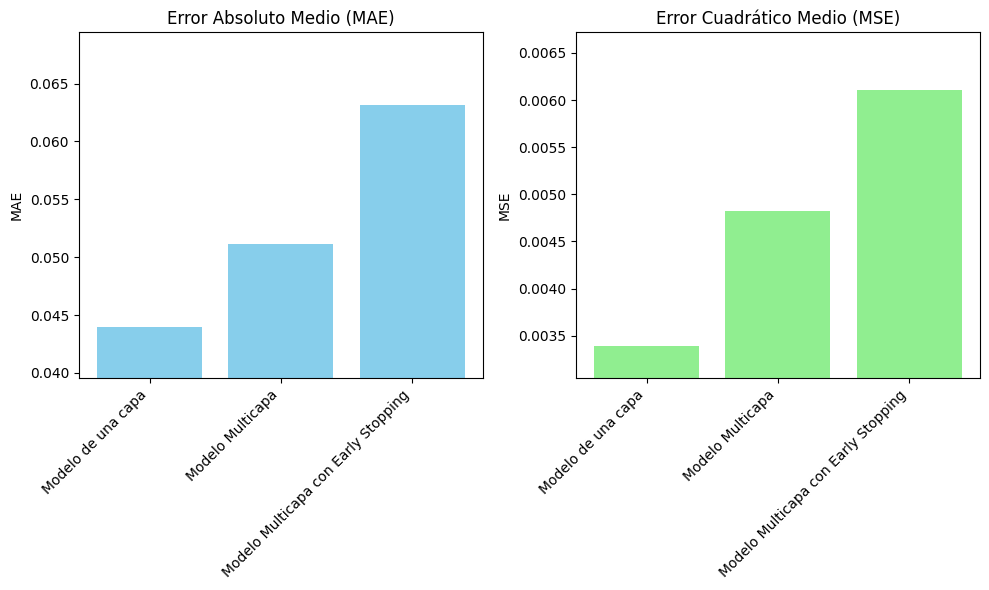

In [13]:
# Celda 4
model_names = ['Modelo de una capa', 'Modelo Multicapa', 'Modelo Multicapa con Early Stopping']
mae_values = [mae_one, mae_mul, mae_mul2]
mse_values = [mse_one, mse_mul, mse_mul2]

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.bar(model_names, mae_values, color='skyblue')
plt.title('Error Absoluto Medio (MAE)')
plt.ylabel('MAE')
plt.ylim(min(mae_values) * 0.9, max(mae_values) * 1.1)
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
plt.bar(model_names, mse_values, color='lightgreen')
plt.title('Error Cuadrático Medio (MSE)')
plt.ylabel('MSE')
plt.ylim(min(mse_values) * 0.9, max(mse_values) * 1.1)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

El modelo de una sola capa es el más adecuado en cuanto a rendimiento y simplicidad, mientras que el modelo multicapa muestra signos de sobreajuste.

VENTAJAS DEL MEJOR MODELO (PUNTO 1: RED NEURONAL DE UNA CAPA):

- Tiene una pérdida muy baja en el conjunto de entrenamiento y en el de validación, lo que indica un buen ajuste del modelo a los datos.

- El MAE y MSE son los más bajos entre los tres modelos.

-	Debido a que tiene una sola capa, resulta más simple y rápido de entrenar y ejecutar.




---




DESVENTAJAS DEL PEOR MODELO (PUNTO 3: RED NEURONAL MULTICAPA):

-	Tiene niveles de MSE y MAE más altos, lo cual sugieren que es un modelo con predicciones menos precisas que los modelos 1 y 2.

- Muestra tener el peor rendimiento en comparación con los otros 2 modelos. Agregarle early stopping puede ayudar con temas de sobreajuste, sin embargo, vimos que esto puede introducir complejidad al modelo.

- El número de épocas puede variar ya que no es fijo.
